# Predictive Customer Relationship Management using Graph-Deep Learning

In [61]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split 
import keras 
from keras.models import Sequential 
from keras.layers import InputLayer 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.constraints import maxnorm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [62]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import scikitplot as skplt
import matplotlib.pyplot as plt

In [162]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Convolution2D, MaxPooling2D, Flatten
from keras import optimizers
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [63]:
df = pd.read_csv('CRM_new1.csv')
df.head()

,sales_enquiry_id,Product,Seller,Authority,Comp_size,Competitors,Purch_dept,Partnership,Budgt_alloc,Forml_tend,...,Source,Client,Scope,Strat_deal,Cross_sale,Up_sale,Deal_type,Needs_def,Att_t_client,Status
0,id-1001,Product A,Seller 6,Mid,Mid,No,Unknown,No,Yes,No,...,Referral,Current,Clear,Very important,No,Yes,Project,Yes,Strategic account,Won
1,id-1002,Product B,Seller 8,Mid,Big,No,Yes,No,Unknown,No,...,Referral,Current,Clear,Unimportant,No,Yes,Maintenance,Yes,Strategic account,Won
2,id-1003,Product F,Seller 1,Mid,Big,No,No,Yes,No,No,...,Joint past,Current,Few questions,Average important,Yes,No,Project,Info gathering,Strategic account,Won
3,id-1004,Product B,Seller 8,Mid,Big,No,Yes,No,No,No,...,Joint past,Current,Clear,Very important,No,Yes,Maintenance,Yes,Strategic account,Won
4,id-1005,Product C,Seller 1,Mid,Small,Unknown,No,No,No,No,...,Unknown,New,Few questions,Average important,No,No,Project,No,Normal,Won


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sales_enquiry_id  448 non-null    object
 1   Product           448 non-null    object
 2   Seller            448 non-null    object
 3   Authority         448 non-null    object
 4   Comp_size         448 non-null    object
 5   Competitors       448 non-null    object
 6   Purch_dept        448 non-null    object
 7   Partnership       448 non-null    object
 8   Budgt_alloc       448 non-null    object
 9   Forml_tend        448 non-null    object
 10  RFI               448 non-null    object
 11  RFP               448 non-null    object
 12  Growth            448 non-null    object
 13  Posit_statm       448 non-null    object
 14  Source            448 non-null    object
 15  Client            448 non-null    object
 16  Scope             448 non-null    object
 17  Strat_deal      

In [65]:
data=df
data.Status.replace(["Won", "Lost"], [1, 0], inplace= True)
data.drop("sales_enquiry_id", axis= 1, inplace= True)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product       448 non-null    object
 1   Seller        448 non-null    object
 2   Authority     448 non-null    object
 3   Comp_size     448 non-null    object
 4   Competitors   448 non-null    object
 5   Purch_dept    448 non-null    object
 6   Partnership   448 non-null    object
 7   Budgt_alloc   448 non-null    object
 8   Forml_tend    448 non-null    object
 9   RFI           448 non-null    object
 10  RFP           448 non-null    object
 11  Growth        448 non-null    object
 12  Posit_statm   448 non-null    object
 13  Source        448 non-null    object
 14  Client        448 non-null    object
 15  Scope         448 non-null    object
 16  Strat_deal    448 non-null    object
 17  Cross_sale    448 non-null    object
 18  Up_sale       448 non-null    object
 19  Deal_typ

In [67]:
data = pd.get_dummies(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Status                          448 non-null    int64
 1   Product_Product A               448 non-null    uint8
 2   Product_Product B               448 non-null    uint8
 3   Product_Product C               448 non-null    uint8
 4   Product_Product D               448 non-null    uint8
 5   Product_Product E               448 non-null    uint8
 6   Product_Product F               448 non-null    uint8
 7   Product_Product G               448 non-null    uint8
 8   Product_Product H               448 non-null    uint8
 9   Product_Product I               448 non-null    uint8
 10  Product_Product J               448 non-null    uint8
 11  Product_Product K               448 non-null    uint8
 12  Product_Product L               448 non-null    uint8
 13  Produ

In [68]:
data.head(10)

,Status,Product_Product A,Product_Product B,Product_Product C,Product_Product D,Product_Product E,Product_Product F,Product_Product G,Product_Product H,Product_Product I,...,Deal_type_Project,Deal_type_Solution,Needs_def_Info gathering,Needs_def_No,Needs_def_Poor,Needs_def_Yes,Att_t_client_Bad client,Att_t_client_First deal,Att_t_client_Normal,Att_t_client_Strategic account
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
5,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
6,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
7,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
8,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
9,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [69]:
X = data.drop("Status", axis= 1)
y = data.Status

In [70]:
X.head()

,Product_Product A,Product_Product B,Product_Product C,Product_Product D,Product_Product E,Product_Product F,Product_Product G,Product_Product H,Product_Product I,Product_Product J,...,Deal_type_Project,Deal_type_Solution,Needs_def_Info gathering,Needs_def_No,Needs_def_Poor,Needs_def_Yes,Att_t_client_Bad client,Att_t_client_First deal,Att_t_client_Normal,Att_t_client_Strategic account
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [71]:
y.head(6)

0    1
1    1
2    1
3    1
4    1
5    0
Name: Status, dtype: int64

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

## Model -1- Random Forest

In [73]:
rf = RandomForestClassifier(n_estimators=120, max_depth=30, random_state=42)
rf.fit(X_train, y_train) 
score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.941
Test set accuracy:  0.867


In [74]:
rf_predictions = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)

In [75]:
rf_predictions

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1], dtype=int64)

In [76]:
rf_probs

array([[0.75666667, 0.24333333],
       [0.07      , 0.93      ],
       [0.83027778, 0.16972222],
       [0.03060606, 0.96939394],
       [0.73      , 0.27      ],
       [0.01666667, 0.98333333],
       [0.017     , 0.983     ],
       [0.73      , 0.27      ],
       [0.34559524, 0.65440476],
       [0.74666667, 0.25333333],
       [0.40333333, 0.59666667],
       [0.64966667, 0.35033333],
       [0.002     , 0.998     ],
       [0.3       , 0.7       ],
       [0.05      , 0.95      ],
       [0.19733333, 0.80266667],
       [0.05      , 0.95      ],
       [0.25571429, 0.74428571],
       [0.50283333, 0.49716667],
       [0.85      , 0.15      ],
       [0.02      , 0.98      ],
       [0.18661111, 0.81338889],
       [0.17966667, 0.82033333],
       [0.27823737, 0.72176263],
       [0.99      , 0.01      ],
       [0.64333333, 0.35666667],
       [0.03      , 0.97      ],
       [0.96      , 0.04      ],
       [0.002     , 0.998     ],
       [0.586     , 0.414     ],
       [0.

In [77]:
y_pred_rf = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))
print(accuracy_score(y_test, y_pred_rf))

[[38  6]
 [ 6 40]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        44
           1       0.87      0.87      0.87        46

    accuracy                           0.87        90
   macro avg       0.87      0.87      0.87        90
weighted avg       0.87      0.87      0.87        90

0.8666666666666667


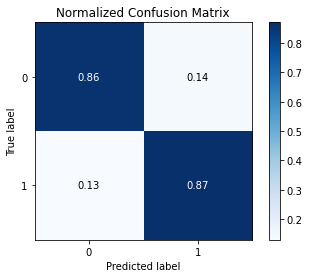

In [79]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf, normalize=True)
plt.show()

### Plot the ROC curve

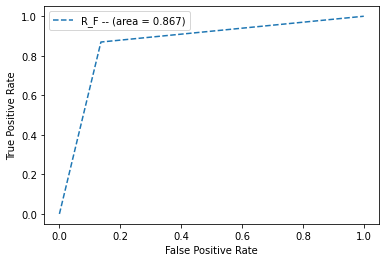

In [80]:
rf_fpr, rf_tpr, _ = roc_curve(y_test,y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
# plot the roc curve for the model
pyplot.plot(rf_fpr, rf_tpr, linestyle='--', label='R_F -- (area = %0.3f)' % roc_auc_rf)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Precision-Recall Curves

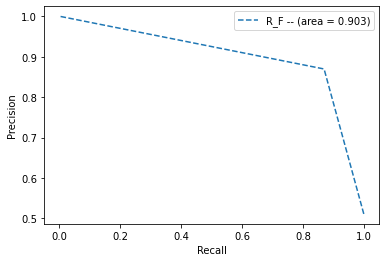

In [81]:
rf_precision, rf_recall, thresholds = precision_recall_curve(y_test,y_pred_rf)
pr_auc_rf=auc(rf_recall, rf_precision)
pyplot.plot(rf_recall, rf_precision, linestyle='--', label='R_F -- (area = %0.3f)' % pr_auc_rf)
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Model 2-  ANN Feedforward Neural Network

In [147]:
model = Sequential()
model.add(Dense(64, input_dim=95, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(rate=0.2))
model.add(Dense(48, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(rate=0.2))
model.add(Dense(1, activation='sigmoid'))

In [148]:
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=['accuracy'])

In [149]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=8)

Train on 358 samples, validate on 90 samples
Epoch 1/50
358/358 [==============================] - 1s 1ms/step - loss: 0.6281 - accuracy: 0.6620 - val_loss: 0.5254 - val_accuracy: 0.8000
Epoch 2/50
358/358 [==============================] - 0s 565us/step - loss: 0.5488 - accuracy: 0.7346 - val_loss: 0.4769 - val_accuracy: 0.8000
Epoch 3/50
358/358 [==============================] - 0s 532us/step - loss: 0.5148 - accuracy: 0.7737 - val_loss: 0.4552 - val_accuracy: 0.8000
Epoch 4/50
358/358 [==============================] - 0s 540us/step - loss: 0.4934 - accuracy: 0.7905 - val_loss: 0.4436 - val_accuracy: 0.8111
Epoch 5/50
358/358 [==============================] - 0s 532us/step - loss: 0.4746 - accuracy: 0.7877 - val_loss: 0.4395 - val_accuracy: 0.7889
Epoch 6/50
358/358 [==============================] - 0s 532us/step - loss: 0.4599 - accuracy: 0.7877 - val_loss: 0.4227 - val_accuracy: 0.8222
Epoch 7/50
358/358 [==============================] - 0s 568us/step - loss: 0.4616 - accuracy

In [151]:
y_pred_ann = model.predict(X_test)
y_pred_ann

array([[2.9100925e-02],
       [9.9995148e-01],
       [9.5669627e-03],
       [7.8222358e-01],
       [2.8428435e-04],
       [9.7859740e-01],
       [9.7580343e-01],
       [1.5277267e-03],
       [6.3986462e-01],
       [1.6192794e-03],
       [9.4192332e-01],
       [1.0178086e-01],
       [9.3586153e-01],
       [9.5379817e-01],
       [9.2486405e-01],
       [9.5614254e-01],
       [9.9995011e-01],
       [5.5451471e-01],
       [4.4609073e-01],
       [4.1723251e-07],
       [9.9876881e-01],
       [9.9369919e-01],
       [9.9856603e-01],
       [6.2553048e-01],
       [5.9604645e-07],
       [6.2106901e-01],
       [9.6303570e-01],
       [6.9409609e-05],
       [9.3586153e-01],
       [7.3503554e-03],
       [9.9751079e-01],
       [2.9742974e-01],
       [2.7522445e-04],
       [6.6226709e-01],
       [5.1557851e-01],
       [9.9995148e-01],
       [1.2414128e-02],
       [4.1723251e-07],
       [5.5245805e-01],
       [3.2883883e-04],
       [9.6792436e-01],
       [0.000000

In [152]:
y_pred_ann = (y_pred_ann > 0.5)
y_pred_ann

array([[False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [

In [153]:
print(confusion_matrix(y_test, y_pred_ann))

[[38  6]
 [ 7 39]]


In [154]:
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        44
           1       0.87      0.85      0.86        46

    accuracy                           0.86        90
   macro avg       0.86      0.86      0.86        90
weighted avg       0.86      0.86      0.86        90



In [155]:
print(accuracy_score(y_test, y_pred_ann))

0.8555555555555555


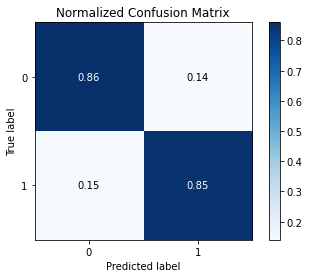

In [156]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_ann, normalize=True)
plt.show()

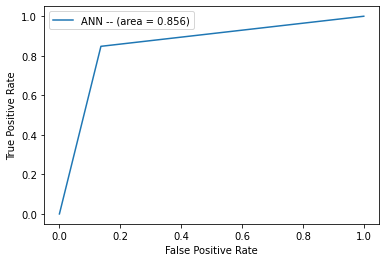

In [157]:
ann_fpr, ann_tpr, _ = roc_curve(y_test,y_pred_ann)
roc_auc_ann = roc_auc_score(y_test, y_pred_ann)
# plot the roc curve for the model
pyplot.plot(ann_fpr, ann_tpr, linestyle='-', label='ANN -- (area = %0.3f)' % roc_auc_ann)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

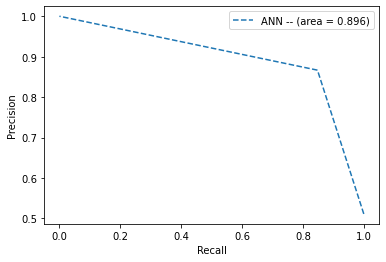

In [287]:
ann_precision, ann_recall, thresholds = precision_recall_curve(y_test,y_pred_ann)
pr_auc_ann=auc(ann_recall, ann_precision)
pyplot.plot(ann_recall, ann_precision, linestyle='--', label='ANN -- (area = %0.3f)' % pr_auc_ann)
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Model -3: CONVOLUTIONAL NEURAL NETWORK (CNN)

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Status                          448 non-null    int64
 1   Product_Product A               448 non-null    uint8
 2   Product_Product B               448 non-null    uint8
 3   Product_Product C               448 non-null    uint8
 4   Product_Product D               448 non-null    uint8
 5   Product_Product E               448 non-null    uint8
 6   Product_Product F               448 non-null    uint8
 7   Product_Product G               448 non-null    uint8
 8   Product_Product H               448 non-null    uint8
 9   Product_Product I               448 non-null    uint8
 10  Product_Product J               448 non-null    uint8
 11  Product_Product K               448 non-null    uint8
 12  Product_Product L               448 non-null    uint8
 13  Produ

In [268]:
X = data.drop("Status", axis= 1)
y = data.Status

In [269]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
#y_train_onehot = pd.get_dummies(y_train).values

In [270]:
img_rows, img_cols = 19,5
nb_filters = 1000
pool_size = (1, 1)
kernel_size = (1, 1)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [271]:
model = Sequential()
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('tanh'))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation('sigmoid'))

f:\anaconda3\envs\dl1\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1000, (1, 1), input_shape=(19, 5, 1), padding="valid")`
  after removing the cwd from sys.path.
f:\anaconda3\envs\dl1\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1000, (1, 1))`
  


In [272]:
model.compile(loss='mean_squared_error', optimizer='Nadam', metrics=['accuracy'])

In [273]:
model.fit(X_train, y_train, epochs=60)

Epoch 1/60
358/358 [==============================] - 1s 3ms/step - loss: 0.3822 - accuracy: 0.5922
Epoch 2/60
358/358 [==============================] - 1s 2ms/step - loss: 0.2170 - accuracy: 0.7486
Epoch 3/60
358/358 [==============================] - 1s 2ms/step - loss: 0.1859 - accuracy: 0.7821
Epoch 4/60
358/358 [==============================] - 1s 2ms/step - loss: 0.1625 - accuracy: 0.8073
Epoch 5/60
358/358 [==============================] - 1s 2ms/step - loss: 0.1557 - accuracy: 0.8101
Epoch 6/60
358/358 [==============================] - 1s 2ms/step - loss: 0.1442 - accuracy: 0.8128
Epoch 7/60
358/358 [==============================] - 1s 2ms/step - loss: 0.1453 - accuracy: 0.8156
Epoch 8/60
358/358 [==============================] - 1s 2ms/step - loss: 0.1250 - accuracy: 0.8268
Epoch 9/60
358/358 [==============================] - 1s 2ms/step - loss: 0.1247 - accuracy: 0.8324
Epoch 10/60
358/358 [==============================] - 1s 2ms/step - loss: 0.1096 - accuracy: 0.8547

In [274]:
y_pred_cnn_f = model.predict(X_test)

In [275]:
print(y_pred_cnn_f.shape)

(90, 1)


In [279]:
y_pred_cnn = (y_pred_cnn_f > 0.5)
#y_pred_cnn1=y_pred_cnn[:,1]
#y_pred_cnn0=y_pred_cnn[:,0]

In [280]:
print(confusion_matrix(y_test, y_pred_cnn))
#print(confusion_matrix(y_test, y_pred_cnn0))

[[34 10]
 [ 7 39]]


In [282]:
print(classification_report(y_test, y_pred_cnn))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        44
           1       0.80      0.85      0.82        46

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90



In [283]:
print(accuracy_score(y_test, y_pred_cnn))

0.8111111111111111


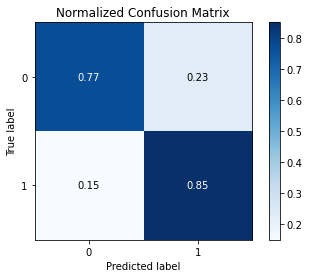

In [284]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_cnn, normalize=True)
plt.show()

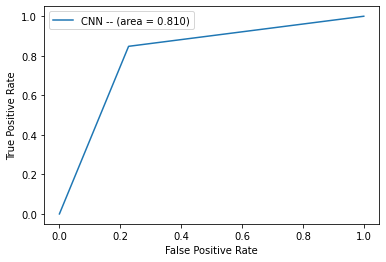

In [285]:
cnn_fpr, cnn_tpr, _ = roc_curve(y_test,y_pred_cnn)
roc_auc_cnn = roc_auc_score(y_test, y_pred_cnn)
# plot the roc curve for the model
pyplot.plot(cnn_fpr, cnn_tpr, linestyle='-', label='CNN -- (area = %0.3f)' % roc_auc_cnn)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

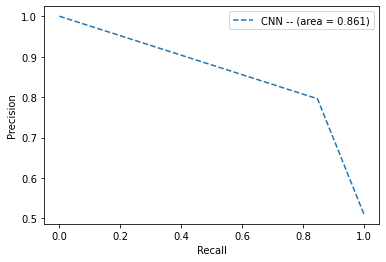

In [286]:
cnn_precision, cnn_recall, thresholds = precision_recall_curve(y_test,y_pred_cnn)
pr_auc_cnn=auc(cnn_recall, cnn_precision)
pyplot.plot(cnn_recall, cnn_precision, linestyle='--', label='CNN -- (area = %0.3f)' % pr_auc_cnn)
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()